<a href="https://colab.research.google.com/github/juliansma/NLP/blob/main/4_Predicci%C3%B3n_de_C%C3%A1ncer_de_seno_usando_subclassing_en_Keras_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:red"><center>  4. Predicción de Cáncer de seno usando subclassing en Keras.</center></span>

Julián Santiago Martínez

## <span style="color:blue">Importa módulos</span>

In [ ]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
#
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
#
from tensorflow.keras.models import Sequential
#
from tensorflow.keras.layers import Dense, Dropout
#
from tensorflow.keras.utils import plot_model
#
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
#
print(tf.__version__)

2.8.0


### Meta-información sobre los datos


1. ID number
2. Diagnosis (M = maligno, B = benigno) 

Se calculan diez características de valor real para cada núcleo celular:

  - radius (media de las distancias desde el centro a los puntos del perímetro) 
  - texture (desviación estándar de los valores de la escala de grises) 
  - perimeter
  - area
  - smoothness (variación local en las longitudes de los radios)
  - compactness (perímetro ^ 2 / área - 1.0) 
  - concavity (severidad de las porciones cóncavas del contorno) 
  - concave points (número de porciones cóncavas del contorno) 
  - symetry 
  - fractal dimension ("aproximación de la línea de costa"
 
La media, el error estándar y el "peor" o el mayor (la media de los tres valores más grandes) de estas características se calcularon para cada imagen, lo que resultó en 30 características. Por ejemplo, el campo 3 es Radio medio, el campo 13 es Radio SE, el campo 23 es Peor radio.

Todos los valores de las características se recodifican con cuatro dígitos significativos.

datos faltantes: ninguno

Distribución de clases: 357 benignos, 212 malignos




## <span style="color:blue">Lectura de datos</span>

### Separa entrada (features) y salida 

In [ ]:
# Importing data

data = pd.read_csv('data.csv')
del data['Unnamed: 32']

## <span style="color:blue">Preprocesamiento</span>

In [ ]:
x = data.iloc[:,2:].values # extrae como arreglos numpy
y = data.iloc[:,1].values

### Recodifica la variable objetivo

In [ ]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

### Divide los datos. Entrenamiento y test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)


In [ ]:
x_test.shape

(57, 30)

### Normaliza los datos

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## <span style="color:blue">Crea el modelo Sequential modo 2</span>

In [ ]:
classifier = Sequential()
## Adiciona capas una por una
classifier.add(Dense(units=16, activation='relu', input_shape=(30,)))
# Adding dropout to prevent overfitting (regularización)
classifier.add(Dropout(0.1)) # 10% out in each epoc
classifier.add(Dense(units=16, activation='relu'))
# Adding dropout to prevent overfitting (regularización)
classifier.add(Dropout(0.1))
classifier.add(Dense(units=1, activation='sigmoid'))


## <span style="color:blue">Compila</span>

In [ ]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


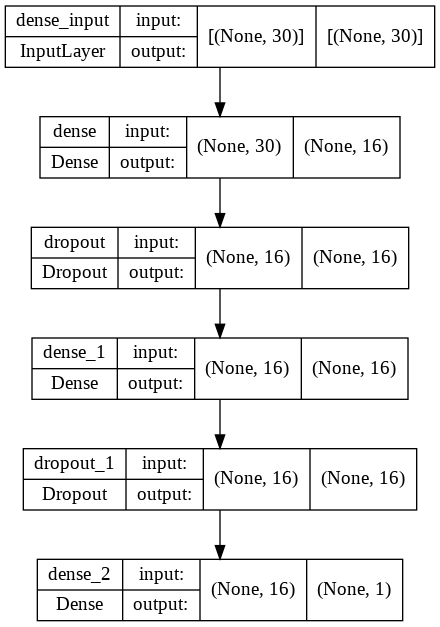

In [ ]:
classifier.summary()
plot_model(classifier, 
           show_shapes=True)

## <span style="color:blue">Entrenamiento</span>

In [ ]:
history = classifier.fit(x_train, y_train, batch_size=32, epochs=150,validation_split = 0.2)

Epoch 1/150
13/13 [==============================] - 1s 19ms/step - loss: 0.6856 - accuracy: 0.5892 - val_loss: 0.5679 - val_accuracy: 0.7670
Epoch 2/150
13/13 [==============================] - 0s 4ms/step - loss: 0.5453 - accuracy: 0.7775 - val_loss: 0.4449 - val_accuracy: 0.8738
Epoch 3/150
13/13 [==============================] - 0s 5ms/step - loss: 0.4514 - accuracy: 0.8631 - val_loss: 0.3635 - val_accuracy: 0.9029
Epoch 4/150
13/13 [==============================] - 0s 4ms/step - loss: 0.3944 - accuracy: 0.8924 - val_loss: 0.3049 - val_accuracy: 0.9515
Epoch 5/150
13/13 [==============================] - 0s 5ms/step - loss: 0.3270 - accuracy: 0.9095 - val_loss: 0.2563 - val_accuracy: 0.9515
Epoch 6/150
13/13 [==============================] - 0s 6ms/step - loss: 0.2751 - accuracy: 0.9242 - val_loss: 0.2180 - val_accuracy: 0.9612
Epoch 7/150
13/13 [==============================] - 0s 5ms/step - loss: 0.2395 - accuracy: 0.9242 - val_loss: 0.1868 - val_accuracy: 0.9709
Epoch 8/150


## <span style="color:blue">Predicciones</span>

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
#y_pred = (y_pred > 0.5)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <=0.5] = 0

## <span style="color:blue">Matriz de confusión</span>

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/y_test.shape[0])*100))

Our accuracy is 100.0%


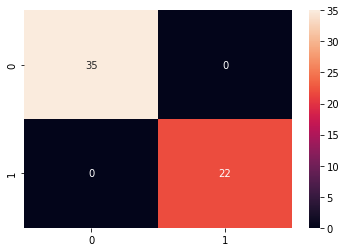

In [ ]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

## <span style="color:blue">Evaluación del modelo</span> 

In [ ]:

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Entrenamiento y validación '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

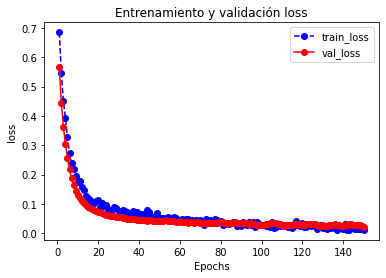

In [ ]:
plot_metric(history, 'loss')

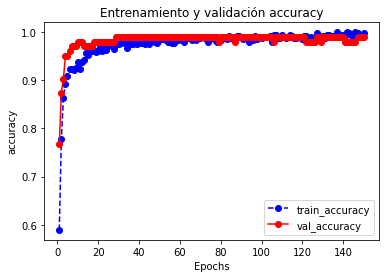

In [ ]:
plot_metric(history, 'accuracy')